In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from typing import List
import glob

In [2]:
list_dir = glob.glob('/home/phu/Downloads/Pendulum/**_00**')

In [3]:
list_dir

['/home/phu/Downloads/Pendulum/precal_pendulum_0001_1000.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_points_001_100.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_0001_600.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_points_100_0001_700_1.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_points_0001_900.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_0001_700.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_100_0001_700_1.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_001_400.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_points_0001_700.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_001_500.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_points_pi_0001_700_2.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_points_pi_0001_700_1.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_points_0001_1000.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_001_200.npy',
 '/home/phu/Downloads/Pendulum/precal_pendulum_points_001_300.n

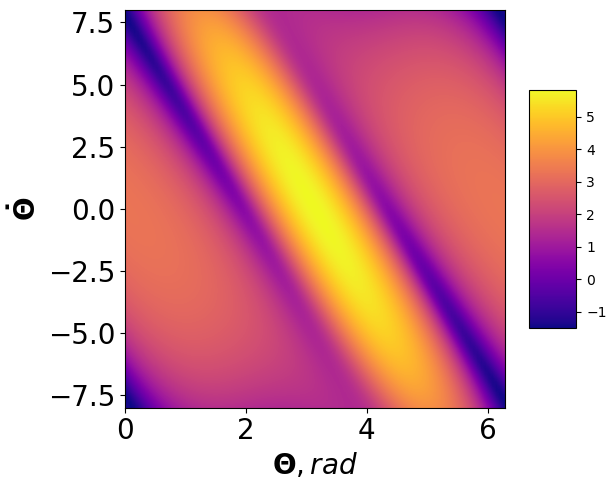

In [45]:
zs = np.load('/home/phu/Downloads/Pendulum/precal_pendulum_0001_500.npy')
# X_reshaped = np.load('/home/phu/Downloads/Pendulum/precal_pendulum_points_100_0001_700.npy')
# tjt=np.load("/home/phu/Downloads/pendulum_trajectory_3.npy")
# tjt[0] = tjt[0]-2*np.pi
# tjt = np.delete(tjt.T, [0]).T
# tjt_temp = tjt.T
# # tjt = np.delete(tjt_temp, [0])
# tjt = tjt.T[1::].T
# tjt_fixed = []
# for i in tjt[0]:
#     if i>np.pi:
#         tjt_fixed.append(i - 2*np.pi)
#     else:
#         tjt_fixed.append(i)
    
T = 500
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

plot1 = ax.imshow(np.flip(zs[:,0].reshape(101,101),1).T, extent=[0,2*np.pi , -8,8],aspect='auto',cmap='plasma',interpolation="bilinear")
# ax.plot(tjt_fixed,tjt[1],linewidth=3, c='white')
cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
font = {'size': 20}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
ax.set_ylabel(r"$\mathbf{\dot{\Theta}}$", fontsize = 20)
ax.set_xlabel(r"$\mathbf{\Theta},rad$", fontsize = 20)
# plt.title ('Simple Pendulum T=5s', fontsize = 20)


plt.tight_layout()
fig.savefig('thesis_plots/pendulum-05.png', transparent=True)

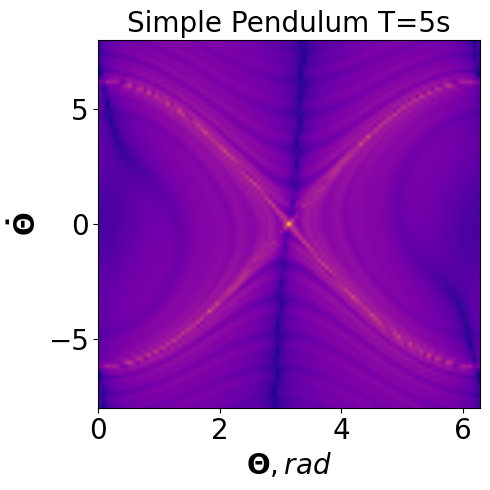

In [17]:
zs = np.load('/home/phu/Downloads/Pendulum/precal_pendulum_001_500.npy')
# X_reshaped = np.load('/home/phu/Downloads/Pendulum/precal_pendulum_points_100_0001_700.npy')
# tjt=np.load("/home/phu/Downloads/pendulum_trajectory_3.npy")
# tjt[0] = tjt[0]-2*np.pi
# tjt = np.delete(tjt.T, [0]).T
# tjt_temp = tjt.T
# # tjt = np.delete(tjt_temp, [0])
# tjt = tjt.T[1::].T
# tjt_fixed = []
# for i in tjt[0]:
#     if i>np.pi:
#         tjt_fixed.append(i - 2*np.pi)
#     else:
#         tjt_fixed.append(i)
    
T = 500
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

plot1 = ax.imshow(np.flip(zs[:,0].reshape(101,101),1).T, extent=[0,2*np.pi , -8,8],aspect='auto',cmap='plasma',interpolation="bilinear")
# ax.plot(tjt_fixed,tjt[1],linewidth=3, c='white')
# cbar1 = fig.colorbar(plot1, shrink=0.6, aspect=5)
font = {'size': 20}
ax.tick_params('x', labelsize=font['size'])
ax.tick_params('y', labelsize=font['size'])
ax.set_ylabel(r"$\mathbf{\dot{\Theta}}$", fontsize = 20)
ax.set_xlabel(r"$\mathbf{\Theta},rad$", fontsize = 20)
plt.title ('Simple Pendulum T=5s', fontsize = 20)
fig.tight_layout()
fig.savefig('/home/phu/Downloads/Pendulum/frame/i.png')

In [19]:
import glob
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in sorted(glob.glob(f"{frame_folder}/*.png"))]
    frame_one = frames[0]
    frame_one.save("pendulum_new.gif", format="GIF", append_images=frames,
               save_all=True, duration=300, loop=0)
    
if __name__ == "__main__":
    make_gif("/home/phu/Downloads/Pendulum/frame/frame_new")

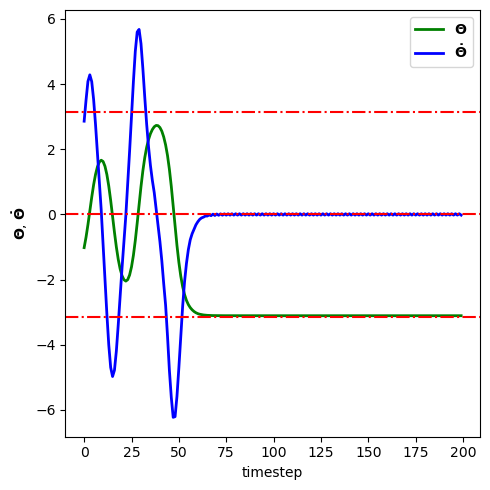

In [3]:
tjt=np.load("/home/phu/Downloads/pendulum_trajectory_3.npy")
tjt = tjt.T[1::].T
tjt_fixed = []
for i in tjt[0]:
    if i>np.pi:
        tjt_fixed.append(i - 2*np.pi)
    else:
        tjt_fixed.append(i)
        
tjt[0] = tjt_fixed
xfinal = tjt        
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
# ax.set_title(r"$\mathbf{\Theta_1}$ vs. timestep")
ax.set_xlabel('timestep')
ax.set_ylabel(r"$\mathbf{\Theta}$, $\mathbf{\dot{\Theta}}$")
# ax.plot(np.array(list(range(len(x[0])))), x[0])
ax.plot(np.array(list(range(len(xfinal[0])))), xfinal[0], linewidth=2,c = 'green',label=r"$\mathbf{\Theta}$")
ax.plot(np.array(list(range(len(xfinal[1])))), xfinal[1], linewidth=2, c = 'blue',label=r"$\mathbf{\dot{\Theta}}$")
ax.axhline(y = -np.pi, color = 'r', linestyle = 'dashdot')
ax.axhline(y = np.pi, color = 'r', linestyle = 'dashdot')
ax.axhline(y = 0, color = 'r', linestyle = 'dashdot')
plt.legend(loc="upper right")

# ax1 = fig.add_subplot(212)
# ax1.set_title(r"$\mathbf{\dot{\Theta_1}}$ vs. timestep")
# ax1.set_xlabel('timestep')
# ax1.set_ylabel(r"$\mathbf{\dot{\Theta_1}}$")
# # ax1.plot(np.array(list(range(len(x[1])))), x[1])
# ax1.plot(np.array(list(range(len(xfinal[1])))), xfinal[1], c = 'green')
# ax1.axhline(y = 0, color = 'r', linestyle = 'dashdot')


# fig.suptitle('Simple Pendulum Stablization', fontsize=18)
fig.tight_layout()
plt.savefig('thesis_plots/coordinatesvstime_pendulum_le.png', transparent=True)